In [37]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv("/Users/guoweizhe/Documents/ECE-475/Assignment3/Social_Network_Ads.csv") 
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0)

np.append(np.ones((len(df), 1)), df, axis = 1)

row_train = (int)(df.shape[0]*0.8)
row_val = (int)(df.shape[0]*0.9)
row_test = (int)(df.shape[0])

xtra_set = df. iloc [0:row_train, 1:4]
xtra_set['const'] = np.ones(row_train)
xtra_set = np.array(xtra_set)

xval_set = df.iloc[row_train:row_val,1:4]
xval_set['const'] = np.ones(row_val - row_train)
xval_set = np.array(xval_set)

xtest_set = df.iloc[row_val:row_test,1:4]
xtest_set['const'] = np.ones(row_test - row_val)
xtest_set = np.array(xtest_set)

ytra_set = np.array(df.iloc[0:row_train,4])
yval_set = np.array(df.iloc[row_train:row_val,4])
ytest_set = np.array(df.iloc[row_val:row_test,4])

#normalization
xtra_set = preprocessing.scale(xtra_set)
xval_set = preprocessing.scale(xval_set)
xtest_set = preprocessing.scale(xtest_set)

print(row_train)
print(row_val)
print(row_test)


320
360
400


In [40]:
# logistic regression and SGD, cross-validate to find the proper lamda for regularized data
import random

rand_ind = np.zeros(20000)

for x in range(20000):
    rand_ind[x]= random.randint(0,row_train-1)
#print(rand_ind)
lams = [10000, 5000, 1000, 500, 100, 50,10, 5, 1, 0.8, 0.5, 0.2, 0.15, 0.1, 0.08, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
irange = np.arange(0, 39, 1)

alpha = 0.001

def likelihood(w1, w2, xtra_set, ytra_set, lam):
    g1 = 0
    g2 = 0
    J1 = 1
    J2 = 1
    J1 = np.log(np.prod(np.power(1 / (1 + np.exp(-np.dot(xtra_set, w1))), ytra_set) * np.power(1 - 1 / (1 + np.exp(-np.dot(xtra_set, w1))), 1 - ytra_set)))
    J2 = np.log(np.prod(np.power(1 / (1 + np.exp(-np.dot(xtra_set, w2))), ytra_set) * np.power(1 - 1 / (1 + np.exp(-np.dot(xtra_set, w2))), 1 - ytra_set)))
    return J1, J2
       
        
def gradient_descent(w1, w2, xtra_set, y_tra_set, lam, rand_ind, J_all, J_all2):
    #J_all = np.zeros((20000, 1))
    #J_all2 = np.zeros((20000, 1))
    for j in range(20000):
        k = int(rand_ind[j])
        J_all[j], J_all2[j] = likelihood(w1, w2, xtra_set, ytra_set, lam)
        w1 = w1 - alpha * ((1 / (1 + np.exp(-np.dot(xtra_set[k], w1))) - ytra_set[k]) * xtra_set[k] + lam * w1)
        w2 = w2 - alpha * ((1 / (1 + np.exp(-np.dot(xtra_set[k], w2))) - ytra_set[k]) * xtra_set[k])
    
    return w1, w2, J_all, J_all2
    
max_correct = 0
best_lamda = 0

for lam in lams:
    #print (lam)
    w1 = np.zeros(4)
    w2 = np.zeros(4)
    J_all = np.zeros((20000, 1))
    J_all2 = np.zeros((20000, 1))
    w1, w2,_,_ = gradient_descent(w1, w2, xtra_set, ytra_set, lam, rand_ind, J_all, J_all2)
    
    y_pred = np.zeros(row_val - row_train)
    ncorrect =0
    for i in irange:
        y_pred[i] = 1 / (1 + np.exp(-np.dot(np.array(w1),np.array(xval_set[i]))))
        #print(y_pred[i])
        y_pred[i] = 0 if y_pred[i] <= 0.5 else 1
        if yval_set[i] == y_pred[i]:
            ncorrect = ncorrect + 1
            #print(ncorrect)
    correct_rate = ncorrect/(row_val - row_train)
    #print(correct_rate)
    
    if max_correct < correct_rate:
        max_correct = correct_rate
        best_lamda = lam
        
print('best lamda with regularization is: %.4f' % best_lamda)


best lamda with regularization is: 5.0000


In conclusion, the regularized SGD converges to a lower likelihodd because it adds in a penalization term to prevent it getting overfit.


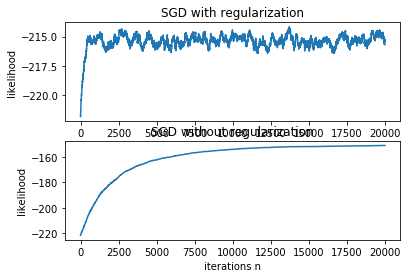

In [41]:
# plot the two graphs of likelihood vs. iterations

w1_best = np.zeros(4)
w2_best = np.zeros(4)
w1_best, w2_best, J_all, J_all2 = gradient_descent(w1_best, w2_best, xtra_set, ytra_set, best_lamda, rand_ind, J_all, J_all2)


#print(J_all2)
n = range(20000)
plt.subplot(211)
plt.plot(n, J_all)
plt.xlabel('iterations n') 
plt.ylabel('likelihood') 
plt.title('SGD with regularization') 

plt.subplot(212)
plt.plot(n, J_all2)
plt.xlabel('iterations n') 
plt.ylabel('likelihood') 
plt.title('SGD without regularization') 

print('In conclusion, the regularized SGD converges to a lower likelihodd because it adds in a penalization term to prevent it getting overfit.')

In [42]:
def test(w, xtest_set):
    y_pred = np.zeros(40)
    ncorrect =0
    for i in irange:
        y_pred[i] = 1 / (1 + np.exp(-np.dot(np.array(w),np.array(xtest_set[i]))))
        #print(y_pred[i])
        y_pred[i] = 0 if y_pred[i] <= 0.5 else 1
        if ytest_set[i] == y_pred[i]:
            ncorrect = ncorrect + 1
            #print(ncorrect)
        #print (y_pred)
    correct_rate = ncorrect/30
    return correct_rate

test1 = test(w1_best, xtest_set)
test2 = test(w2_best, xtest_set)
print('correct percentage on test set with regularization: %.3f' %test1 )
print('correct percentage on test set without regularization: %.4f' %test2)
print('Because the dataset size is too small, the test set only contains 30 entries. And this might cause the relatively lower correct percentage.')

correct percentage on test set with regularization: 0.800
correct percentage on test set without regularization: 0.8000
Because the dataset size is too small, the test set only contains 30 entries. And this might cause the relatively lower correct percentage.
